In this part, as there is a link between the FULL and SVD, so performed this is 2 steps;
	
    1. Ran the model against the FULL-DATASET again.But, from the variation standpoint used "tenforflow DENSE layer API" directly unlike earlier part where used "X.W+B" explicitly.
	
    2. Once the model is executed, captured the final set of Weights and then used them as inputs for the next model with SVD (D =20).
	
    3. Ran the model and finally plotted the accuracy graph for visualization.

In [1]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

# Q1 Full

In [0]:
# Initialize param

learning_rate = 0.001
training_epochs = 20 #50
batch_size = 500 # 100 # 1000
n_classes = 10
n_samples = 55000
n_input = 784
n_hidden_1 = 1024
n_hidden_2 = 1024
n_hidden_3 = 1024
n_hidden_4 = 1024
n_hidden_5 = 1024


# Defining the Network with 5 Layers.

def network_full_exp3(x):
	layer_1_full_exp3 = tf.layers.dense(
   		    x,
   		    n_hidden_1,
   		    activation=tf.nn.relu,
   		    kernel_initializer=tf.contrib.layers.xavier_initializer(),
   		    bias_initializer=tf.zeros_initializer(),
   		    name='layer_1_full_exp3'
	)

	layer_2_full_exp3 = tf.layers.dense(
   		    layer_1_full_exp3 ,
   		    n_hidden_2,
   		    activation=tf.nn.relu,
   		    kernel_initializer=tf.contrib.layers.xavier_initializer(),
   		    bias_initializer=tf.zeros_initializer(),
   		    name='layer_2_full_exp3'
	)
	layer_3_full_exp3 = tf.layers.dense(
   		    layer_2_full_exp3 ,
   		    n_hidden_3,
   		    activation=tf.nn.relu,
   		    kernel_initializer=tf.contrib.layers.xavier_initializer(),
   		    bias_initializer=tf.zeros_initializer(),
   		    name='layer_3_full_exp3'
	)
	layer_4_full_exp3 = tf.layers.dense(
   		    layer_3_full_exp3 ,
   		    n_hidden_4,
   		    activation=tf.nn.relu,
   		    kernel_initializer=tf.contrib.layers.xavier_initializer(),
   		    bias_initializer=tf.zeros_initializer(),
   		    name='layer_4_full_exp3'
	)
	layer_5_full_exp3 = tf.layers.dense(
   		    layer_4_full_exp3 ,
   		    n_hidden_5,
   		    activation=tf.nn.relu,
   		    kernel_initializer=tf.contrib.layers.xavier_initializer(),
   		    bias_initializer=tf.zeros_initializer(),
   		    name='layer_5_full_exp3'

	)
	out_layer_full_exp3 = tf.layers.dense(layer_5_full_exp3 , n_classes,
		    name='layer_out_full_exp3'
	)
	return out_layer_full_exp3

# Input placeholder 

x = tf.placeholder('float',[None, n_input])

# Output placeholder
y = tf.placeholder('float',[None, n_classes])

# Call funtion

pred_full_exp3= network_full_exp3(x)

# Cost which we want to minimize

cost_full_exp3 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred_full_exp3,labels = y))

# Opimizer

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_full_exp3)

# opening tf session

session = tf.InteractiveSession()

# Initialize all variabes
init = tf.global_variables_initializer()
session.run(init)

#######
print ("Variables before training")
old_var = {}
for var in tf.global_variables():
  old_var[var.name] = session.run(var)
  #print (var.name, session.run(var))
#print(old_var)
new_var = {}
#######

    
# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    
    # Interested in only the second parameter COST
    # feedig input data as dictionary 
    
    _, c = session.run([optimizer, cost_full_exp3], feed_dict={x:batch_x, y:batch_y})
    
    avg_cost += c/total_batch
    
  print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))
  
print("\nFinally the Model has completed {} epochs of training".format(training_epochs))
  
  
# Model Evaluation

# FInd the index location where the "pred" value is coming as 1. 

# FInd the index location where the "y" lable value is coming as 1.

# Finally compare the 2 values using tf.equal

correct_predictions_full_exp3 = tf.equal(tf.argmax(pred_full_exp3,1), tf.argmax(y,1))

# As the correct_predictions return type value is of type Boolean so will CAST it to Float

correct_predictions_full_exp3 = tf.cast(correct_predictions_full_exp3,float)

# Calculate MEAN across tensors which will give the Train Data Set Accuracy

accuracy_full_exp3 = tf.reduce_mean(correct_predictions_full_exp3)

# Read the MNIST TEST data and calculate Test Data accuracy using "eval" function

acc = accuracy_full_exp3.eval({x:mnist.test.images, y:mnist.test.labels})

print("accuracy:", acc)

print ("Variables after training")
for var in tf.global_variables():
  new_var[var.name] = session.run(var)
  #print (var.name, session.run(var))
#print(new_var)

print('Check variable changes')
for vname in new_var:
  eq = np.array_equal(old_var[vname], new_var[vname])
  #print('Is {} changed? {}'.format(vname, not eq))



Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Variables before training
1 Epoch: cost is 0.3258 
2 Epoch: cost is 0.0868 
3 Epoch: cost is 0.0565 
4 Epoch: cost is 0.0405 
5 Epoch: cost is 0.0322 
6 Epoch: cost is 0.0283 
7 Epoch: cost is 0.0253 
8 Epoch: cost is 0.0236 
9 Epoch: cost is 0.0201 
10 Epoch: cost is 0.0188 
11 Epoch: cost is 0.0190 
12 Epoch: cost is 0.0139 
13 Epoch: cost is 0.0136 
14 Epoch: cost is 0.0148 
15 Epoch: cost is 0.0103 
16 Epoch: cost is 0.0118 
17 Epoch: cost is 0.0089 
18 Epoch: cost is 0.0102 
19 Epoch: cost is 0.0083 
20 Epoch: cost is 0.0041 

Finally the Model has completed 20 epochs of training
accuracy: 0.9828
Variables after training
Check variable changes


In [0]:

(new_var.keys())

dict_keys(['layer_1_full_exp3/kernel:0', 'layer_1_full_exp3/bias:0', 'layer_2_full_exp3/kernel:0', 'layer_2_full_exp3/bias:0', 'layer_3_full_exp3/kernel:0', 'layer_3_full_exp3/bias:0', 'layer_4_full_exp3/kernel:0', 'layer_4_full_exp3/bias:0', 'layer_5_full_exp3/kernel:0', 'layer_5_full_exp3/bias:0', 'layer_out_full_exp3/kernel:0', 'layer_out_full_exp3/bias:0', 'beta1_power:0', 'beta2_power:0', 'layer_1_full_exp3/kernel/Adam:0', 'layer_1_full_exp3/kernel/Adam_1:0', 'layer_1_full_exp3/bias/Adam:0', 'layer_1_full_exp3/bias/Adam_1:0', 'layer_2_full_exp3/kernel/Adam:0', 'layer_2_full_exp3/kernel/Adam_1:0', 'layer_2_full_exp3/bias/Adam:0', 'layer_2_full_exp3/bias/Adam_1:0', 'layer_3_full_exp3/kernel/Adam:0', 'layer_3_full_exp3/kernel/Adam_1:0', 'layer_3_full_exp3/bias/Adam:0', 'layer_3_full_exp3/bias/Adam_1:0', 'layer_4_full_exp3/kernel/Adam:0', 'layer_4_full_exp3/kernel/Adam_1:0', 'layer_4_full_exp3/bias/Adam:0', 'layer_4_full_exp3/bias/Adam_1:0', 'layer_5_full_exp3/kernel/Adam:0', 'layer_5

**Accuracy**

In [0]:
acc

0.9828

# Assign Weights from previous model

In [0]:
# Extract weights and bias from the base model. (Stored all those varibales under the Dictionary 'new_var')

New_wt_hl1_full_exp3 = new_var['layer_1_full_exp3/kernel:0']
New_wt_hl2_full_exp3 = new_var['layer_2_full_exp3/kernel:0']
New_wt_hl3_full_exp3 = new_var['layer_3_full_exp3/kernel:0']
New_wt_hl4_full_exp3 = new_var['layer_4_full_exp3/kernel:0']
New_wt_hl5_full_exp3 = new_var['layer_5_full_exp3/kernel:0']
New_wt_hl_out_full_exp3 = new_var['layer_out_full_exp3/kernel:0']


New_b1_full_exp3 = new_var['layer_1_full_exp3/bias:0']
New_b2_full_exp3 = new_var['layer_2_full_exp3/bias:0']
New_b3_full_exp3 = new_var['layer_3_full_exp3/bias:0']
New_b4_full_exp3 = new_var['layer_4_full_exp3/bias:0']
New_b5_full_exp3 = new_var['layer_5_full_exp3/bias:0']
New_b_out_full_exp3 = new_var['layer_out_full_exp3/bias:0']


# Q1.6.1

In [0]:
# Creating Tensor variables for Weights and biases.
# Initializing variables with weights captured in the base model

New_wt_hl1_full_exp3_q6 = tf.Variable(New_wt_hl1_full_exp3, name='new_wt1')
New_wt_hl2_full_exp3_q6 = tf.Variable(New_wt_hl2_full_exp3, name='new_wt2')
New_wt_hl3_full_exp3_q6 = tf.Variable(New_wt_hl3_full_exp3, name='new_wt3')
New_wt_hl4_full_exp3_q6 = tf.Variable(New_wt_hl4_full_exp3, name='new_wt4')
New_wt_hl5_full_exp3_q6 = tf.Variable(New_wt_hl5_full_exp3, name='new_wt5')
New_wt_hl_out_full_exp3_q6 = tf.Variable(New_wt_hl_out_full_exp3, name='new_wt6')


New_b1_full_exp3_q6 = tf.Variable(New_b1_full_exp3, name='new_b_1')
New_b2_full_exp3_q6 = tf.Variable(New_b2_full_exp3, name='new_b_2')
New_b3_full_exp3_q6 = tf.Variable(New_b3_full_exp3, name='new_b_3')
New_b4_full_exp3_q6 = tf.Variable(New_b4_full_exp3, name='new_b_4')
New_b5_full_exp3_q6 = tf.Variable(New_b5_full_exp3, name='new_b_5')
New_b_out_full_exp3_q6 = tf.Variable(New_b_out_full_exp3, name='new_b_6')

In [0]:
D = 20

# SVD 
def svd_new_wt(wt):
  s, u, v = tf.linalg.svd(wt)  
  
  return s,u,v


# Passed the already trained weights from the FULL netowrk and then ran them through SVD to generate s,u,v resp. matrix.

s_l1, u_l1, v_ll = svd_new_wt(New_wt_hl1_full_exp3_q6)
s_l2, u_l2, v_l2 = svd_new_wt(New_wt_hl2_full_exp3_q6)
s_l3, u_l3, v_l3 = svd_new_wt(New_wt_hl3_full_exp3_q6)
s_l4, u_l4, v_l4 = svd_new_wt(New_wt_hl4_full_exp3_q6)
s_l5, u_l5, v_l5 = svd_new_wt(New_wt_hl5_full_exp3_q6)

print(s_l1.shape)
print(u_l1.shape)
print(v_ll.shape)

(784,)
(784, 784)
(1024, 784)


In [0]:
# Perform the Initial matmul operation and captured final U, V and B

V_new_l1 =  tf.Variable(tf.matmul(tf.linalg.diag(s_l1[:D]) , (v_ll[:, :D]), adjoint_b=True), name='new_v_1')
U_new_l1 =  tf.Variable((u_l1[:, :D]) , name='new_u_1')
B_new_l1 =  tf.Variable(New_b1_full_exp3_q6 , name='new_b_1')

V_new_l2 =  tf.Variable(tf.matmul(tf.linalg.diag(s_l2[:D]) , (v_l2[:, :D]), adjoint_b=True), name='new_v_2')
U_new_l2 =  tf.Variable((u_l2[:, :D]) , name='new_u_2')
B_new_l2 =  tf.Variable(New_b2_full_exp3_q6 , name='new_b_2')

V_new_l3 =  tf.Variable(tf.matmul(tf.linalg.diag(s_l3[:D]) , (v_l3[:, :D]), adjoint_b=True), name='new_v_3')
U_new_l3 =  tf.Variable((u_l3[:, :D]) , name='new_u_3')
B_new_l3 =  tf.Variable(New_b3_full_exp3_q6 , name='new_b_3')

V_new_l4 =  tf.Variable(tf.matmul(tf.linalg.diag(s_l4[:D]) , (v_l4[:, :D]), adjoint_b=True), name='new_v_4')
U_new_l4 =  tf.Variable((u_l4[:, :D]) , name='new_u_4')
B_new_l4 =  tf.Variable(New_b4_full_exp3_q6 , name='new_b_4')

V_new_l5 =  tf.Variable(tf.matmul(tf.linalg.diag(s_l5[:D]) , (v_l5[:, :D]), adjoint_b=True), name='new_v_5')
U_new_l5 =  tf.Variable((u_l5[:, :D]) , name='new_u_5')
B_new_l5 =  tf.Variable(New_b5_full_exp3_q6 , name='new_b_5')

print(V_new_l5.shape)
print(U_new_l5.shape)
print(B_new_l5.shape)





(20, 1024)
(1024, 20)
(1024,)


In [0]:
# Run the Model

# Initialize param

learning_rate = 0.00001
training_epochs = 30
batch_size = 500 
n_classes = 10
n_samples = 55000
n_input = 784
n_hidden_5 = 1024



def network_full_exp3_Q6_new(x):
  
  print("x.shape:", x.shape)
  
  layer_1_full_exp3_Q6 = tf.add(tf.matmul(x, (tf.matmul(U_new_l1,V_new_l1)) ), B_new_l1)
  layer_1_full_exp3_Q6 = tf.nn.relu(layer_1_full_exp3_Q6)
  
  layer_2_full_exp3_Q6 = tf.add(tf.matmul(layer_1_full_exp3_Q6, (tf.matmul(U_new_l2,V_new_l2)) ), B_new_l2)
  layer_2_full_exp3_Q6 = tf.nn.relu(layer_2_full_exp3_Q6)
    
  layer_3_full_exp3_Q6 = tf.add(tf.matmul(layer_2_full_exp3_Q6, (tf.matmul(U_new_l3,V_new_l3)) ), B_new_l3)
  layer_3_full_exp3_Q6 = tf.nn.relu(layer_3_full_exp3_Q6) 
     
  layer_4_full_exp3_Q6 = tf.add(tf.matmul(layer_3_full_exp3_Q6, (tf.matmul(U_new_l4,V_new_l4)) ), B_new_l4)
  layer_4_full_exp3_Q6 = tf.nn.relu(layer_4_full_exp3_Q6)  
     
  layer_5_full_exp3_Q6 = tf.add(tf.matmul(layer_4_full_exp3_Q6, (tf.matmul(U_new_l5,V_new_l5)) ), B_new_l5)
  layer_5_full_exp3_Q6 = tf.nn.relu(layer_5_full_exp3_Q6)
   
  out_layer_full_exp3_Q6 = tf.add(tf.matmul(layer_5_full_exp3_Q6, (New_wt_hl_out_full_exp3_q6)) , New_b_out_full_exp3_q6) 
 
  return out_layer_full_exp3_Q6


In [0]:
# Input placeholder 

xx = tf.placeholder('float',[None, n_input])

# Output placeholder
yy = tf.placeholder('float',[None, n_classes])

# Call funtion

pred_full_exp3_Q6= network_full_exp3_Q6_new(xx)

# Cost which we want to minimize
cost_full_exp3_Q6 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = pred_full_exp3_Q6,labels = yy))

# Opimizer
optimizer_Q6 = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost_full_exp3_Q6)

# correct prediction
correct_prediction_Q6 = tf.equal(tf.argmax(pred_full_exp3_Q6, 1), tf.argmax(yy, 1))

#accuracy
accuracy_Q6 = tf.reduce_mean(tf.cast(correct_prediction_Q6, tf.float32))

# opening tf session

session = tf.InteractiveSession()

# Initialize all variabes
init_Q6 = tf.global_variables_initializer()
session.run(init_Q6)


D_20_acc=[]
D_20_ls=[]

x.shape: (?, 784)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
# total number of loops
for epoch in range(training_epochs):
  
  # Initializing avg_cost
  avg_cost_Q6 = 0.0
  
  # Total Number of batches we want to run.
  # Initializing total number of batches by dividing total number of records/ total number of records per batch or iteration
  
  total_batch = int(n_samples/batch_size)
  
  # Looping through the total number of batches
  
  for i in range(total_batch):
    
    # Using mnist next_batch function which helps to get the data and labels together for the desired number of records.
    
    batch_xx, batch_yy = mnist.train.next_batch(batch_size)
    
    # Interested in only the second parameter COST
    # feedig input data as dictionary 
    
    _, c = session.run([optimizer_Q6, cost_full_exp3_Q6], feed_dict={xx:batch_xx, yy:batch_yy})
    
    avg_cost_Q6 += c/total_batch
    
  loss_val_Q6, acc_val_Q6 = session.run([cost_full_exp3_Q6, accuracy_Q6],feed_dict={xx:mnist.test.images,yy:mnist.test.labels})
  print ('epoch: %d, Loss: %f, Accuracy: %f'% (epoch+1, loss_val_Q6, acc_val_Q6))
  
  D_20_acc.append(acc_val_Q6)
  D_20_ls.append(loss_val_Q6)
  
 # print("{} Epoch: cost is {:.4f} ".format(epoch+1, avg_cost))
  
print("\nFinally the Model has completed {} epochs of training".format(training_epochs))
  
  


epoch: 1, Loss: 0.186393, Accuracy: 0.955300
epoch: 2, Loss: 0.155236, Accuracy: 0.960100
epoch: 3, Loss: 0.140124, Accuracy: 0.961900
epoch: 4, Loss: 0.130604, Accuracy: 0.964200
epoch: 5, Loss: 0.123343, Accuracy: 0.965600
epoch: 6, Loss: 0.117989, Accuracy: 0.966600
epoch: 7, Loss: 0.113741, Accuracy: 0.968300
epoch: 8, Loss: 0.110322, Accuracy: 0.969100
epoch: 9, Loss: 0.107736, Accuracy: 0.969700
epoch: 10, Loss: 0.105242, Accuracy: 0.970400
epoch: 11, Loss: 0.103107, Accuracy: 0.970900
epoch: 12, Loss: 0.101228, Accuracy: 0.971100
epoch: 13, Loss: 0.099664, Accuracy: 0.970800
epoch: 14, Loss: 0.098187, Accuracy: 0.971200
epoch: 15, Loss: 0.097020, Accuracy: 0.972000
epoch: 16, Loss: 0.095917, Accuracy: 0.972400
epoch: 17, Loss: 0.094760, Accuracy: 0.972800
epoch: 18, Loss: 0.093436, Accuracy: 0.972900
epoch: 19, Loss: 0.092634, Accuracy: 0.973500
epoch: 20, Loss: 0.091783, Accuracy: 0.973600
epoch: 21, Loss: 0.090935, Accuracy: 0.974100
epoch: 22, Loss: 0.090209, Accuracy: 0.9748

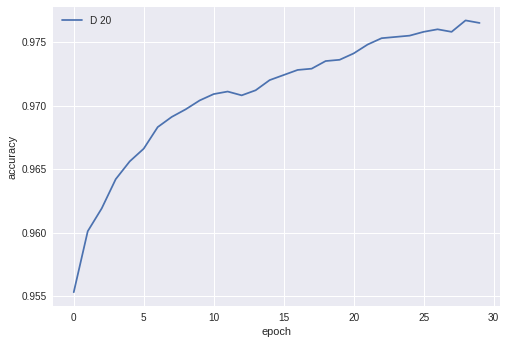

In [0]:
index = [i for i in  range(training_epochs)]

import matplotlib.pyplot as plt
plt.plot(index, D_20_acc,label = "D 20")
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend()
plt.show()